# Project 3: Supervised Learning
## Bank Loan Prediction
### Objective
The objective of this project  is to predict the likelihood of a liability customer buying personal loans.

#### Dataset 

Bank_Personal_Loan_modeling.csv

#### Attribute Information

 ID : Customer ID

 Age : Customer's age in completed years

 Experience : #years of professional experience

 Income : Annual income of the customer ($000)

 ZIP Code : Home Address ZIP code.

 Family : Family size of the customer

 CCAvg : Avg. spending on credit cards per month ($000)

 Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

 Mortgage : Value of house mortgage if any. ($000)

 Personal Loan : Did this customer accept the personal loan offered in the last campaign?

 Securities Account : Does the customer have a securities account with the bank?

 CD Account : Does the customer have a certificate of deposit (CD) account with the bank?

 Online : Does the customer use internet banking facilities?

 Credit card : Does the customer use a credit card issued by


In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score



In [3]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#find the shape of dataframe
bank_df.shape

(5000, 14)

In [6]:
#Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
#a number.
bank_df[~bank_df.applymap(np.isreal).all(1)]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [7]:
#There are no null values present
#Now check the datatype
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
#Lets analysze the distribution of the various attributes
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
# We can see there are some negative values in Experience column. 
# Since experience cannot be in negative we have to conert those values into positives
bank_df['Experience'] = bank_df['Experience'].abs()

In [10]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
# Now the negative values are converted into positives.
# Let us take 'Personal Loan' as target variable and check how it is distributed acroass various attributes.

bank_df.groupby(['Personal Loan']).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [12]:
# Out of 5000, 480 customers belongs to class 1, i.e. they took personal loan from the bank last time. 

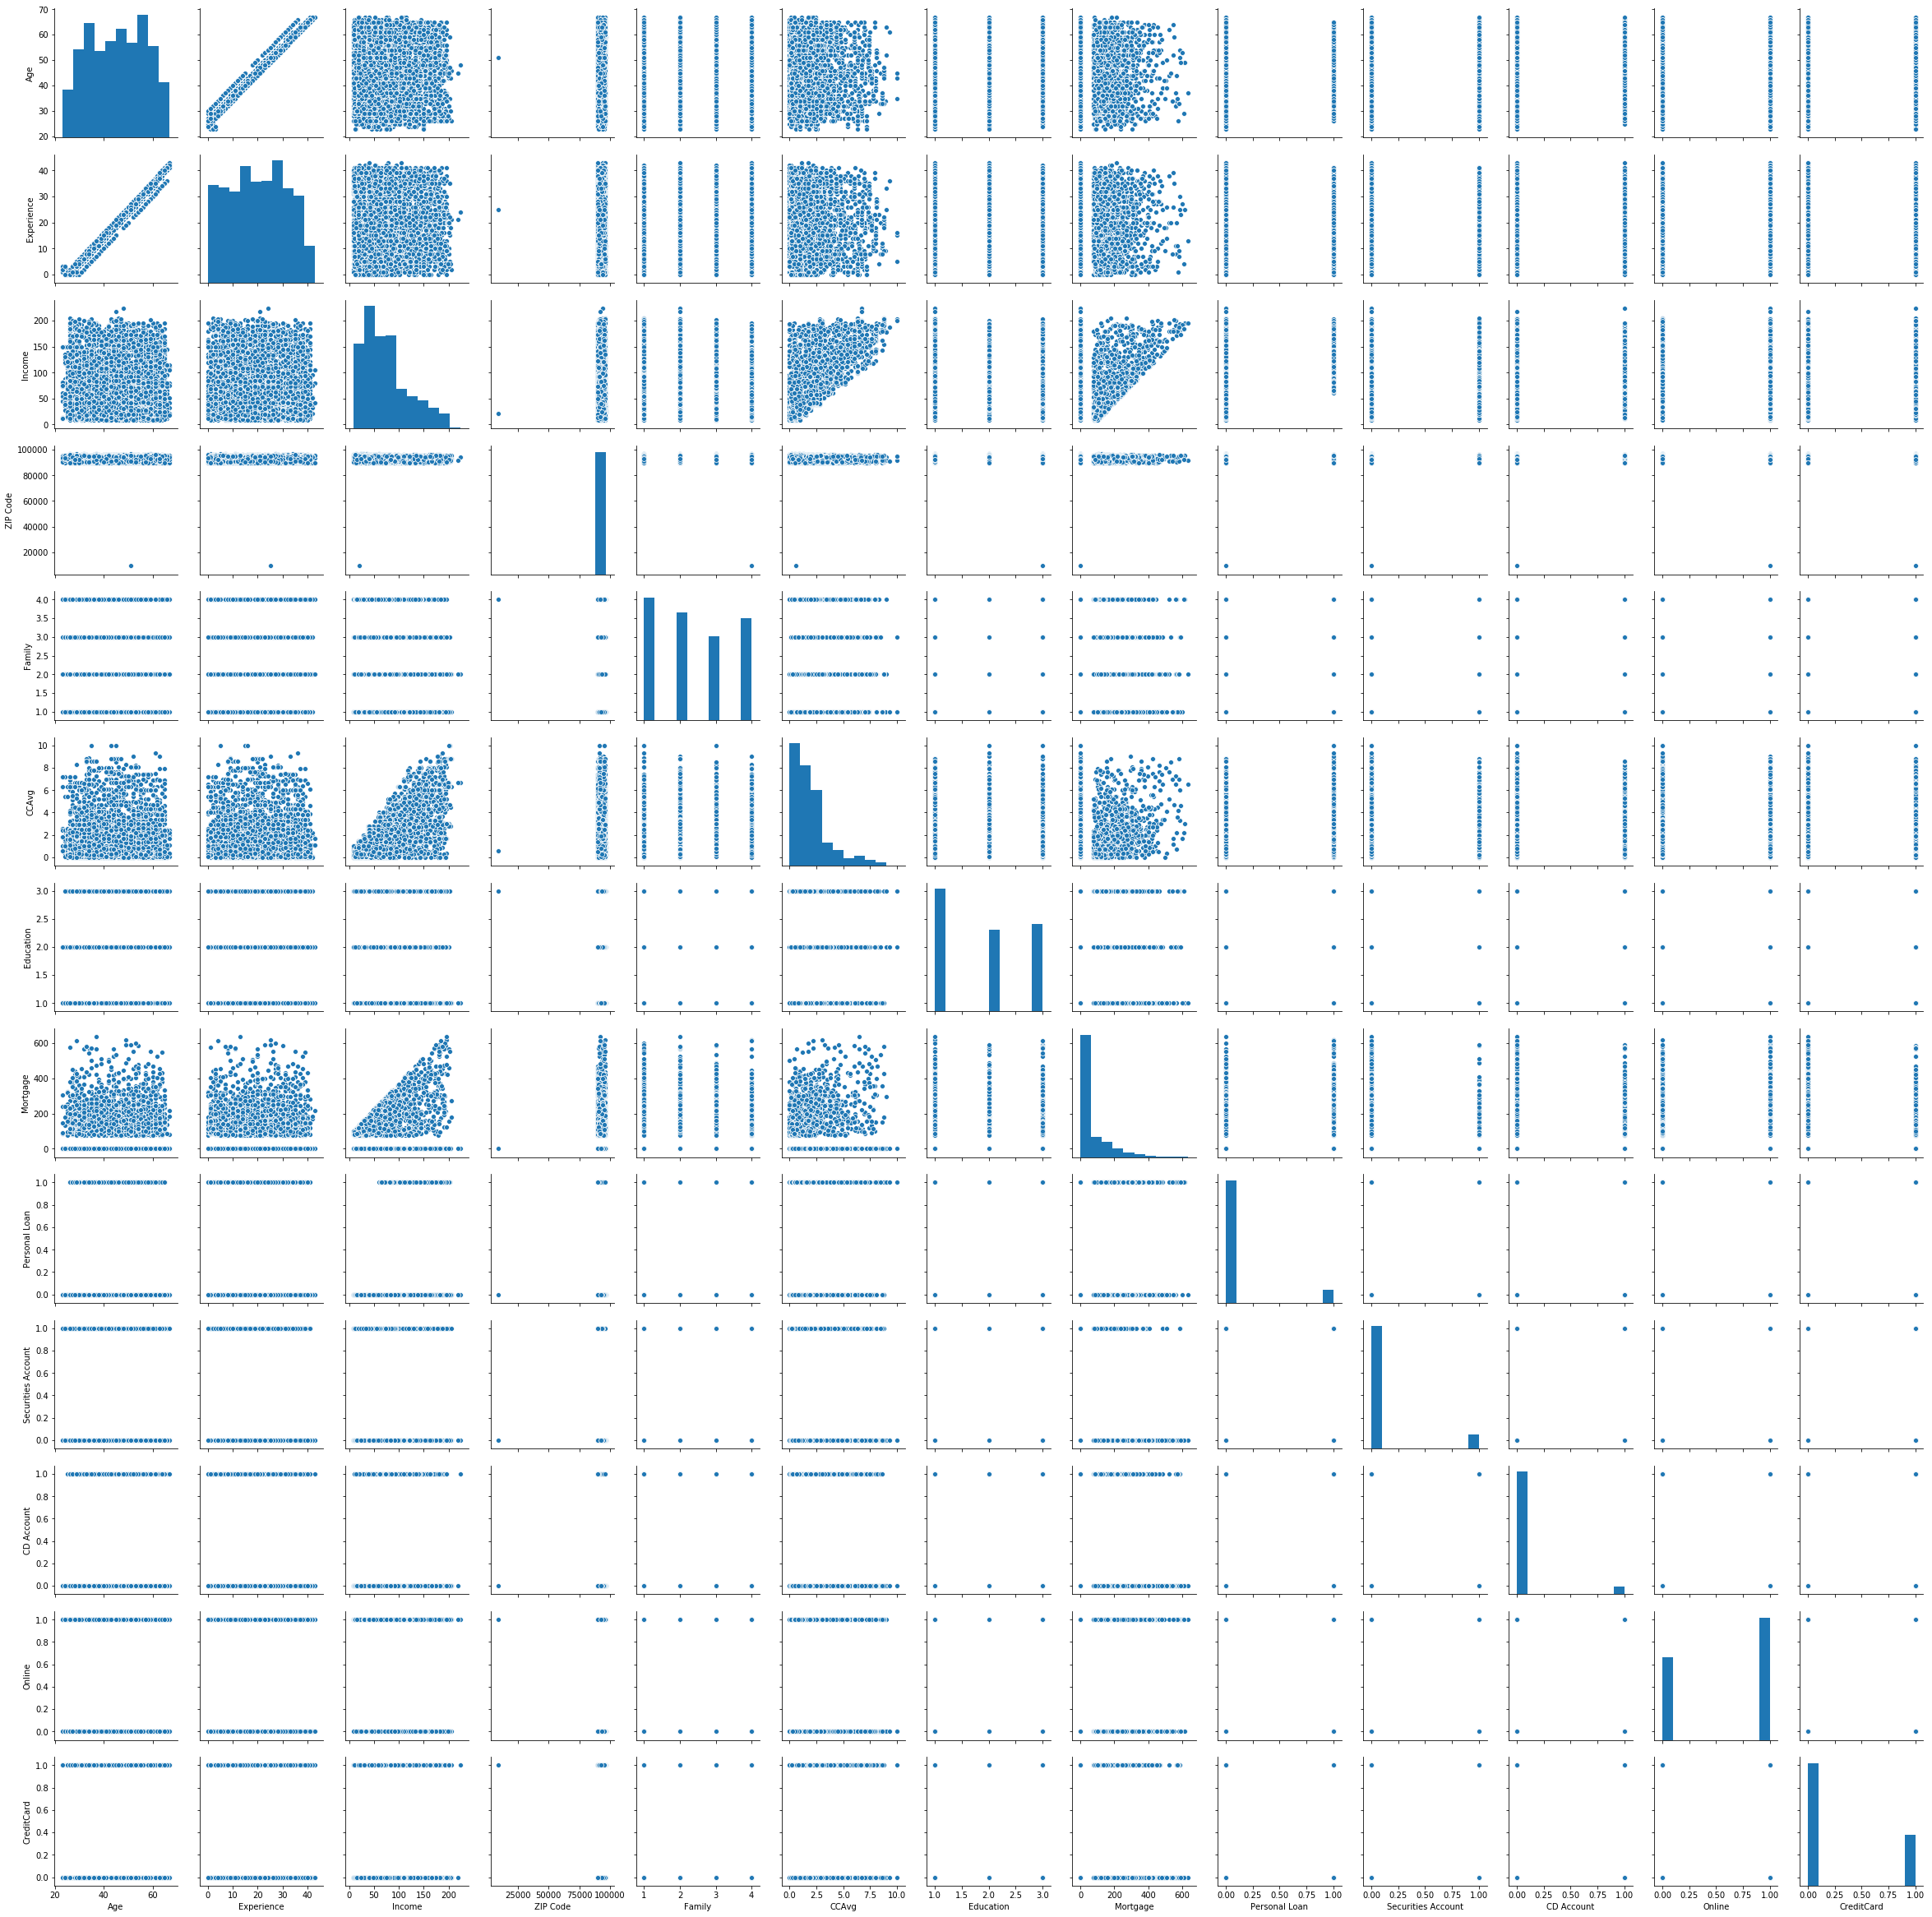

In [13]:
# Correlation analysis among the different dimensions
bank_df_attr = bank_df.iloc[:,1:]
sns.pairplot(bank_df_attr)

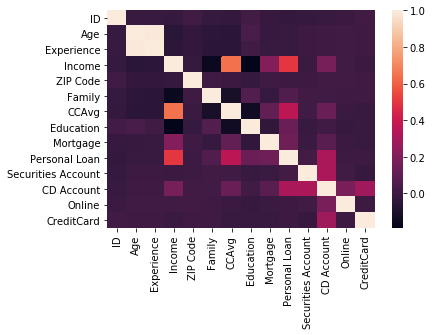

In [14]:
sns.heatmap(bank_df.corr())

In [15]:
# Age: Mean is almost equal to median, it is normally distributed. 
#      Most of the customers falls between the age of 30 and 60
# Age and Experience has strong positive relation.

# Experience: This attribute is also normally distributed and mean is equal to median.

# Income: Income is positively skewed and we can see that mean > median

# CCAvg: CCAvg is also positively skewed and most of the customers spend less than 2.5k

# Mortage: Most of the people have mortage less than 100k.

# Family: Family is evenly distributed.

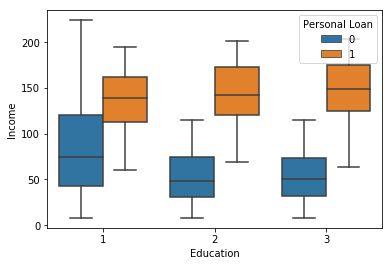

In [16]:
## Checking the influence of Education and Income on Personal Loan

sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_df)

In [17]:
# Customers with education level 1 are having more income.
# Customers who have taken Personal Loan are having same income levels

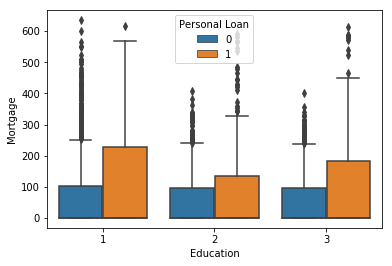

In [18]:
## Checking influence of mortage on personal loan

sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=bank_df)

In [19]:
# Customer who has personal loan is having high mortage

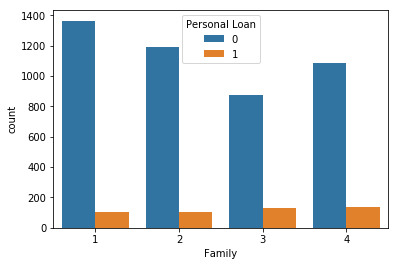

In [20]:
## Influence of family on personal loan

sns.countplot(x='Family',data=bank_df,hue='Personal Loan')

In [21]:
# Family is not having any influence on personal loan

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


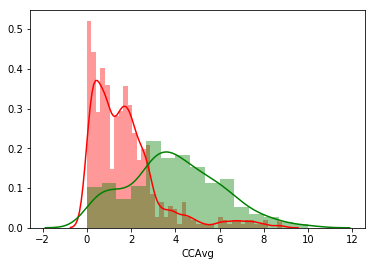

In [22]:
# Influence of credit card average on Personal loan

sns.distplot(bank_df[bank_df['Personal Loan'] == 0]['CCAvg'], color = 'red')
sns.distplot(bank_df[bank_df['Personal Loan'] == 1]['CCAvg'], color = 'green')

In [23]:
# Customers having personal loans are having high credit card average.
# So person who is having more credit card spending, higher is the probability of taking personal loan.

#### Applying models

In [24]:
# Store all the independent attributes into variable X
# Store the target column (Personal Loan) into variable y

X = bank_df.loc[:, bank_df.columns != 'Personal Loan']
y = bank_df.loc[:, bank_df.columns == 'Personal Loan']
X.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1


In [25]:
# Now we will use different Classification models to to predict the likelihood of a liability customer buying personal loans

##### Logistic Model

In [27]:
# Create the training and test dataset in the ratio of 70:30 respectively.
# logistic modeling algorithm requires feature array not dataframe
# Remove the binned columns for this (considered only 11 columns 1:10) which are numeric

feature=X.iloc[:, 0:10]
feature_array = feature.values
target_labels = y.values

# Generate training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_array, target_labels, test_size=0.30, random_state=7)

# Convert 1 d vector into 1 d array
y_train = np.ravel(y_train)

model_log = LogisticRegression()
model_log.fit(X_train, y_train)
model_log_score = model_log.score(X_test, y_test)
predict_log = model_log.predict(X_test)
print("Accuracy = ", model_log_score)
print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test, predict_log))
print("\nSummary: \n", metrics.classification_report(y_test, predict_log))

Accuracy =  0.916

Confusion Matrix: 
 [[1333   29]
 [  97   41]]

Summary: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1362
           1       0.59      0.30      0.39       138

   micro avg       0.92      0.92      0.92      1500
   macro avg       0.76      0.64      0.67      1500
weighted avg       0.90      0.92      0.90      1500



C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# Accuracy score of this model is 91.6%. But it can be dominated by larger class
# We can see that the precision and recall for class 1 is low
# Trying Naive Bayes model

##### Naive Bayes model

In [29]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
model_NB_score = model_NB.score(X_test, y_test)
predictions=model_NB.predict(X_test)
print("Accuracy = ", model_NB_score)
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,predictions))
print("\nSummary : \n", metrics.classification_report(y_test, predictions))

Accuracy =  0.902

Confusion Matrix:
 [[1271   91]
 [  56   82]]

Summary : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      1362
           1       0.47      0.59      0.53       138

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.91      0.90      0.91      1500



In [ ]:
# Naive bayes' model is giving 90.2% of accuracy
# Still Naive Bayes' is also not giving class 1 values in the acceptable range of 80% and above.
# Trying KNN

##### K Nearest Neighbours

In [30]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [31]:
predicted = NNH.predict(X_test)
NNH_score = NNH.score(X_test, y_test)
print("Accuracy = ", NNH_score)
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,predicted))
print("\nSummary : \n", metrics.classification_report(y_test, predicted))

Accuracy =  0.902

Confusion Matrix:
 [[1340   22]
 [ 125   13]]

Summary : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1362
           1       0.37      0.09      0.15       138

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.64      0.54      0.55      1500
weighted avg       0.86      0.90      0.87      1500



In [32]:
# Accuracy is 90.2% but still the precision and recall values of class 1 is least.
# So the probability of finding a class 0 closer to a test point is high
# Let us try the effect of scaling and see if the values are changing

In [33]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [34]:
# Naive Bayes Model:

NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [35]:
predicted_labels = NNH.predict(X_test_scaled)
NNH_score = NNH.score(X_test_scaled, y_test)
print("Accuracy: ", NNH_score)
print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test, predicted_labels))
print("\nSummary : \n", metrics.classification_report(y_test, predicted_labels))

Accuracy:  0.956

Confusion Matrix: 
 [[1353    9]
 [  57   81]]

Summary : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.90      0.59      0.71       138

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.93      0.79      0.84      1500
weighted avg       0.95      0.96      0.95      1500



In [36]:
# We can see that the accuracy is increased to 95.6% after scaling and 
# the precision and recall values also seems to be increased.
# Lets try the same for other models

In [37]:
# Logistic model

model_log.fit(X_train_scaled, y_train)

C:\Users\exsxaxr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
predicted = model_log.predict(X_test_scaled)
model_log_score = model_log.score(X_test_scaled, y_test)
print("Accuracy: ", model_log_score)
print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test, predicted))
print("\nSummary : \n", metrics.classification_report(y_test, predicted))

Accuracy:  0.9513333333333334

Confusion Matrix: 
 [[1343   19]
 [  54   84]]

Summary : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1362
           1       0.82      0.61      0.70       138

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.80      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [39]:
# The accuracy of Logistic model has been increased after scaling.
# The precesion and recall value also got increase but is still less than that of KNN model.
# Lets check for Naive Bayes to conclude which model is performing 

In [40]:
# Naive Bayes Model

model_NB.fit(X_train_scaled, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_predicted = model_NB.predict(X_test_scaled)
model_NB_score = model_NB.score(X_test_scaled, y_test)
print("Accuracy: ", model_NB_score)
print("\nConfusion Matrix: \n", metrics.confusion_matrix(y_test, y_predicted))
print("\nSummary : \n", metrics.classification_report(y_test, y_predicted))

Accuracy:  0.8973333333333333

Confusion Matrix: 
 [[1266   96]
 [  58   80]]

Summary : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1362
           1       0.45      0.58      0.51       138

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.71      0.75      0.73      1500
weighted avg       0.91      0.90      0.90      1500



In [42]:
# After scaling, the accuracy has been reduced for this model.
# So out of these three models, KNN is performing better for this dataset.

#### Summary:

    1. Three classification algorithms were used in this study. Logistic, Naive Bayes and KNN.
    2. As per the above analysis, KNN model got better results than the other two.
    3. Since the aim is to predict the likelihood of a liability customer buying personal, KNN model will 
       be more apt as this can be analyzed by comparing with people with similar features.
